In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Statistics
Practice and study of collecting and analyzing data  
Summary statistic: fact about or summary of some data  
**Statistics can't answer every question**  
### Descriptive statistics
Describe the data at hand
### Inferential statistics
Use sample data to make inferences about a larger population
## Types of data
### Numeric (quantitative)
Continuous (measured)  
Discrete (counted)
### Categorical (qualitative)
Nominal (unordered)  
Ordinal (ordered)

## Measures of center
* Mean np.mean()
Most affected by outliers
* Median np.median()
* Mode np.mode()


## Measures of spread
* Variance np.var(array, ddof=1)  
ddof is for sample, no ddof is for population
* Standard deviation np.std(array, ddof=1)  
* Mean absolute deviation np.abs()
### Quantiles
np.quantile(array, float or list of floats)  
np.linspace(start, stop, num) to split into a specific number of intervals  
### Interquartile range
from scipy.stats import iqr  
iqr(array)  
### Outliers
1. Calculate iqr
2. Set lower and upper threshold 
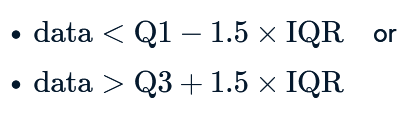
3. Subset the dataframe to find entries below or above the threshold
### Dataframe.describe() to find most of the summary statistics

# Probability
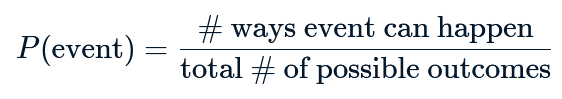
### df.sample(int)
Gets a random row from a dataframe.  
### np.random.seed(10)
Generates the same random value each time.
## Sample with replacement
df.sample(int, replace=True)
## Events
* Independent: when 2 events don't affect the probability of the other one happening.
* Dependent: when the probability of one event is affected by another.

# Discrete distributions
## Probability distribution
Describes the probability of each possible outcome in a scenario  
**Expected value:** mean of a probability distribution
## Law of large numbers
As the size of the sample increases the sample mean will approach the theoretical mean.

# Continuous distributions
**Probability to get <7 in the distribution:**  
from scipy.stats import uniform  
uniform.cdf(7,0,12)
## Generate random numbers according to uniform distribution
uniform.rvs(0,5, size=10)

# Binomial distribution
Distribution of a binary outcome, number of successes in a sequence of **independent** trials      
**Simulate trials**  
from scipy.stats import binom  
binom.rvs(# of coins, probability of heads/success, size = # of trials)  
**Probability of 7 successes**  
binom.pmf(7,10,0.5) -> binom.pmf(# heads, # trials, prob success)  
**Probability of 7 or less successes**  
binom.cdf(7,10,0.5)
## Expected value = n * p

# Normal distribution
Mean 0 and std of 1: **Standard normal distribution**  
* 68% within 1 std
* 95% within 2 std
* 99.7% within 3 std

## Approximating data
**Get percentage of entries below *some number***  
from scipy.stats import norm  
norm.cdf(**number**, mean, std)  
**Get number in which *some percentage* of entries fall on fall on**  
norm.ppf(**percentage**, mean, std)  
**Random numbers from normal distribution**  
norm.rvs(mean, std, size=int)

# Central limit theorem
A sampling distribution will approach a normal distribution as the number of trials increases.
* Samples are random and independent
* Sample distribution of means, stds, proportions  
The mean of the sample means will approach the expected value.  
* Useful for estimating characteristics of unknown underlying distributions

# The Poisson distribution
Probability of some number of events occurring over a fixed period of time.  
## Poisson process
* Events appear to happen at a certain rate, but completely at random
* Time unit is irrelevant as long as it's consistent

## Poisson distribution
λ = average number of events per time interval.  
The distribution's peak it's at its lambda value.  
### Example
**Given an average of 8 events per time period, what is P(5) in the time period?**   
from scipy.stats import poisson  
poisson.pmf(5,8)  
**Probability of less than *number* events happening**  
poisson.cdf(5,8)  
**Random samples**
poisson.rvs(8, size=10)  

# Exponential distribution
Probability of certain time happening between poisson events
* Time unit doesn't matter as long as it's consistent
* Also uses lambda (rate)
* Continuous (time)
In terms of rate (Poisson) = lambda (X events per minute)  
In terms of time (Exponential) = 1/lambda (1 event per X minutes)
## Example
**Probability of waiting less than 1 time period**  
from scipy.stats import expon  
expon.cdf(1, scale=*lambda float*)

# (Student's) T-distribution
* Similar to normal distribution but observations are more likely to fall further from the mean
Degrees of freedom (df) determine thickness of the tails in the distribution.  
    Lower df = thicker tails, higher stdev  
    Higher df = closer to normal distribution
    
# Log-normal distribution
Variable whose logarithm is normally distributed

---

# Correlation
### Relationships between variables in a scatterplot
x = explanatory/independent variable  
y = response/dependent variable
## Correlation coefficient between -1 and 1
Magnitude = strength of relationship  
Sign = direction of the relationship  
## Visualizing with seaborn
import seaborn as sns  
sns.scatterplot(x="column_x_name", y="column_y_name", data=Dataframe)  
or use sns.lmplot()
## Computing correlation
### Pearson product-moment correlation
df['column_x'].corr(df['column_y'])

# Correlation caveats
* Don't use correlation blindly and always visualize
## Log transformation
Use when data is highly skewed to make the relationship more linear  
np.log(df['column'])
## Other transformations
* Square root
* Reciprocal
* Combinations of these

### Why use a transformation?
For statistical methods that rely on variables having a linear relationship but the visualization of the variables show a non-linear but existing correlation. Exponential, quadratic, etc.

## Correlation does not imply causation
### Confounding threats
Spurious correlation examples:
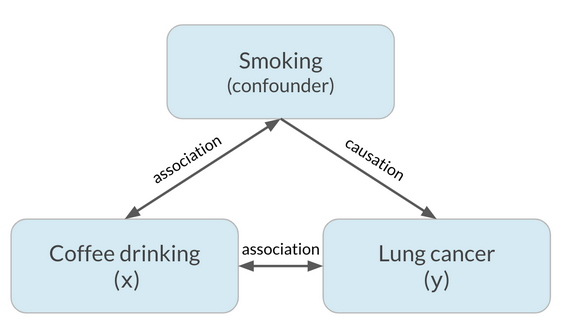
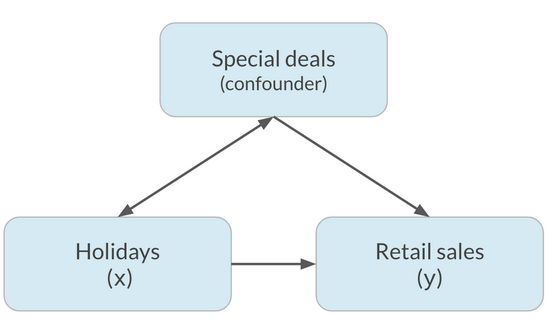

# Design of experiments
Experiment aims to answer: What is the effect of the *treatment* on the *response*?  
Treatment: explanatory/independent variable  
Response: response/dependent variable
## Controlled experiments
Treatment and control group A/B test.  
* Groups should be comparable or it can lead to cofounding (bias)

### Eliminate bias
* Randomized controlled trial
* Placebo

## Double blind trial
Person administering treatment doesn't know placebo or real  

**Fewer opportunities for bias = more reliable conclusion about causation**

## Observational studies
Participants assign themselves to groups based on pre-existing characteristics.
* **Can establish association but not causation**
* There are ways to control for confounders to get more reliable conslusions about association

## Longitudinal study
* Participants are followed over a period of time to examine effect of treatment on response

## Cross-sectional study
* Data on participants is collected from a single snapshot in time